In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


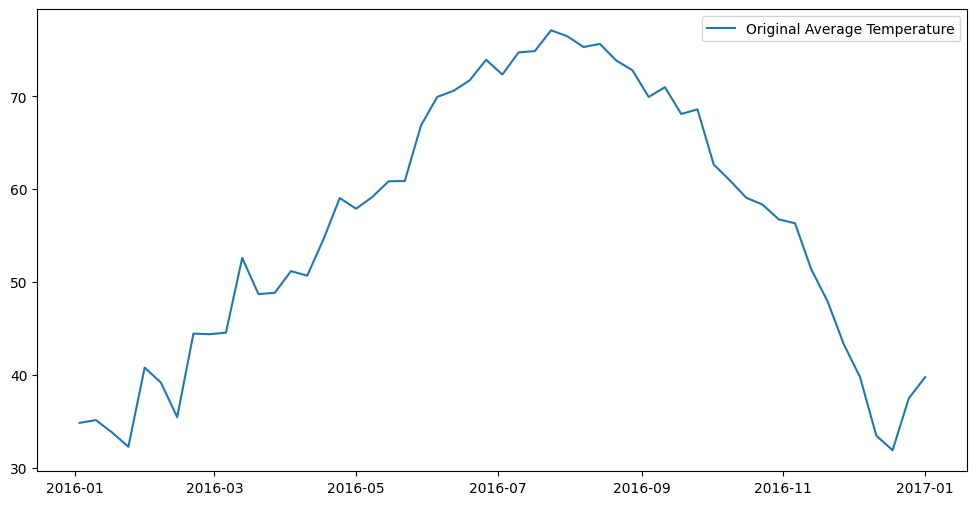

In [2]:
# Load your weather data
data = pd.read_csv('weather.csv')

# Convert Date column to datetime
data['Date.Full'] = pd.to_datetime(data['Date.Full'])
data.set_index('Date.Full', inplace=True)

# Group by Date and compute daily average temperature
daily_avg_temp = data.groupby('Date.Full')['Data.Temperature.Avg Temp'].mean()

# Convert to DataFrame for LSTM compatibility
df = pd.DataFrame(daily_avg_temp)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(df)

# Plot to visualize
plt.figure(figsize=(12,6))
plt.plot(df, label='Original Average Temperature')
plt.legend()
plt.show()


In [3]:
# Define how many previous days you want the model to look back
look_back = 30

X, y = [], []

# Create sequences
for i in range(look_back, len(scaled_data)):
    X.append(scaled_data[i-look_back:i, 0])
    y.append(scaled_data[i, 0])

X, y = np.array(X), np.array(y)

# Reshape input to LSTM expected format: [samples, time_steps, features]
X = np.reshape(X, (X.shape[0], X.shape[1], 1))


In [4]:
# Define the model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))  # Output layer

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [5]:
# Train the LSTM model
history = model.fit(X, y, epochs=20, batch_size=32, verbose=1)


Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 0.3895
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.3010
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.2234
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.1579
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.1091
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.0851
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.0921
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.1113
Epoch 9/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.1153
Epoch 10/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.1038
Epoch 11/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.0874
Epoch 12/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.0739
Epoch 13/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.0658
Epoch 14/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.0626
Epoch 15/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 0.0625
Epoch 16/20
1/1 ━━━━━━━━━━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step


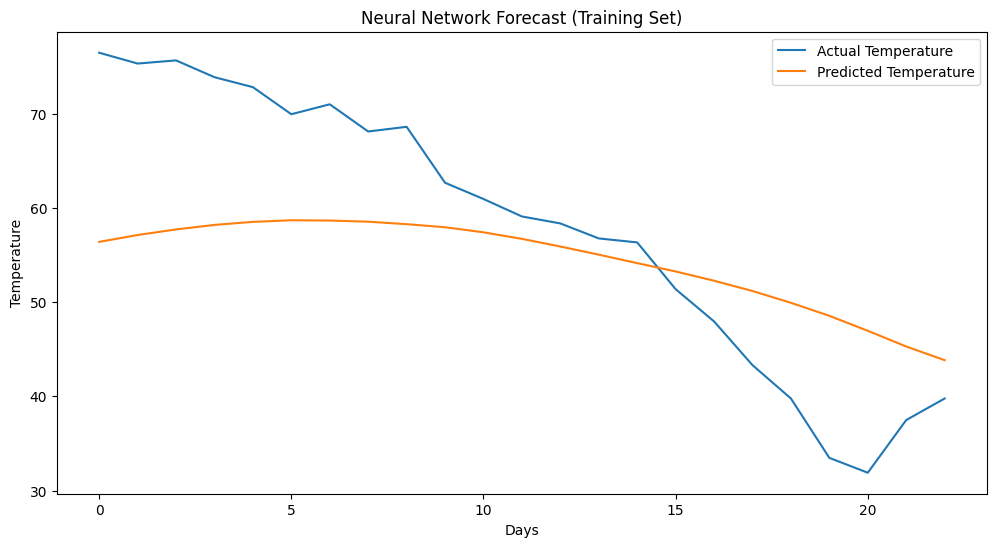

In [6]:
# Predict the values
predicted_temp = model.predict(X)

# Reverse the scaling
predicted_temp = scaler.inverse_transform(predicted_temp.reshape(-1, 1))
real_temp = scaler.inverse_transform(y.reshape(-1, 1))

# Plot actual vs predicted
plt.figure(figsize=(12,6))
plt.plot(real_temp, label='Actual Temperature')
plt.plot(predicted_temp, label='Predicted Temperature')
plt.title('Neural Network Forecast (Training Set)')
plt.xlabel('Days')
plt.ylabel('Temperature')
plt.legend()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━

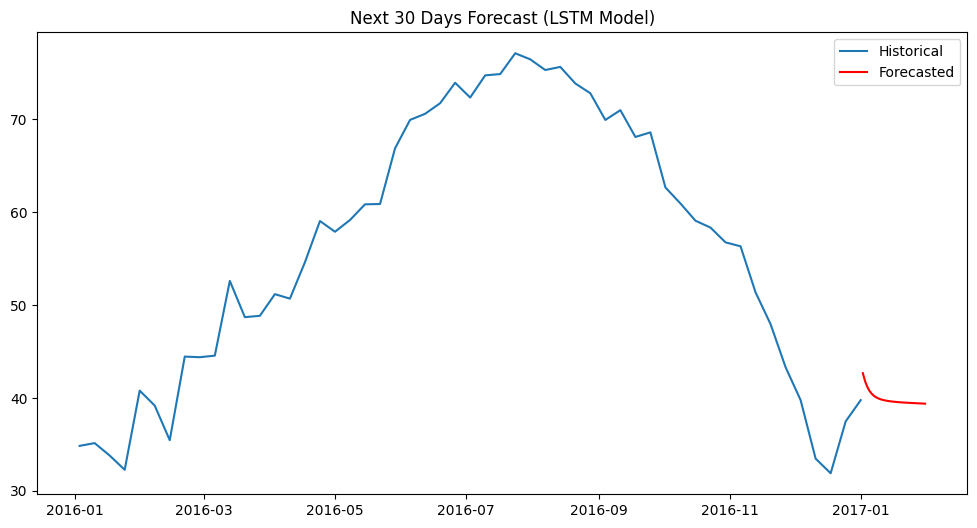

In [7]:
# Forecasting the next 30 days
last_sequence = scaled_data[-look_back:]  # last known sequence
future_predictions = []

input_seq = last_sequence.copy()

for _ in range(30):
    pred = model.predict(input_seq.reshape(1, look_back, 1))
    future_predictions.append(pred[0, 0])
    input_seq = np.append(input_seq[1:], pred[0, 0])  # slide window

# Reverse scaling
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Plot future forecast
future_dates = pd.date_range(df.index[-1] + pd.Timedelta(days=1), periods=30)

plt.figure(figsize=(12,6))
plt.plot(df.index, df['Data.Temperature.Avg Temp'], label='Historical')
plt.plot(future_dates, future_predictions, label='Forecasted', color='red')
plt.title('Next 30 Days Forecast (LSTM Model)')
plt.legend()
plt.show()
